# DS322- Machine Learning
## NBA Players Stats 2023

**Group 2: DS3A** 

- Princess Honey Agbalog
- Ma. Sophia Basa
- Eurice Jean Lopez
- Lein Loisse Odchigue 
- Rodmar Kent Padillo
- Lester Jane Reyes <br>

Date: March 25, 2024<br>

<img src="basketball.jpg" width="1000px">

### A. Problem

In basketball analytics, accurately predicting players' point production is crucial for coaches, analysts, and fans. This metric is vital for assessing offensive ability, making strategic decisions during games, optimizing player selection, and improving talent scouting. Developing precise predictive models for forecasting basketball points is essential for advancing performance analysis and decision-making in the sport.

### B. Data Discussion

**Source:** The dataset for this analysis, titled "2023_nba_player_stats.csv", was retrieved from Kaggle: https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season?fbclid=IwAR1mihzqimN9ftL630PwLN2AiLBTLvsp0NDdpORwz82A3el84naUtKJp0sE  <br/>
**Content:** This dataset focuses on NBA player statistics, presumably for the 2023 season. It contains various performance metrics for individual players, such as minutes played, field goal and free throw success rates, assists, steals, blocks, and potentially other relevant statistics.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tts
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
nba = pd.read_csv('2023_nba_player_stats.csv')
nba.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341


In [3]:
# check the attributes in the dataset
print('Attributes in the dataset: ', nba.columns.values)

Attributes in the dataset:  ['PName' 'POS' 'Team' 'Age' 'GP' 'W' 'L' 'Min' 'PTS' 'FGM' 'FGA' 'FG%'
 '3PM' '3PA' '3P%' 'FTM' 'FTA' 'FT%' 'OREB' 'DREB' 'REB' 'AST' 'TOV' 'STL'
 'BLK' 'PF' 'FP' 'DD2' 'TD3' '+/-']


**Attributes Description:** <br/>
1. **PName:** The name of the basketball player
2. **POS:** The player's position in the game
3. **Team:** The abbreviation of the team the player is currently playing for this season
4. **Age:** The age of the player
5. **GP:** The total number of games the player has played in this season
6. **W:** The total number of games won by the player
7. **L:** The total number of games lost by the player
8. **Min:** The total minutes the player has played in this season
9. **PTS:** The total points made by the player *[target]*
10. **FGM:** The total number of field goals made by the player
11. **FGA:** The total number of field goals attempted by the player
12. **FG%:** The percentage of successful field goals made by the player
13. **3PM:** The total number of 3-point field goals made by the player
14. **3PA:** The total number of 3-point field goals attempted by the player
15. **3P%:** The percentage of successful 3-point field goals made by the player
16. **FTM:** The total number of free throws made by the player
17. **FTA:** The total number of free throws attempted by the player
18. **FT%:** The percentage of successful free throws made by the player
19. **OREB:** The total number of offensive rebounds made by the player
20. **DREB:** The total number of defensive rebounds made by the player
21. **REB:** The total number of rebounds (offensive + defensive) made by the player
22. **AST:** The total number of assists made by the player
23. **TOV:** The total number of turnovers made by the player
24. **STL:** The total number of steals made by the player
25. **BLK:** The total number of blocks made by the player
26. **PF:** The total number of personal fouls made by the player
27. **FP:** The total number of NBA fantasy points made by the player
28. **DD2:** The total number of double doubles made by the player 
29. **TD3:** The total number of triple doubles made by the player
30. **+/-:** The total difference between the player's team scoring and the opponents' scoring while the player is in the game

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [5]:
nba.describe(include = np.number)

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [6]:
nba.describe(include = 'object')

,PName,POS,Team
count,539,534,539
unique,539,7,30
top,Jayson Tatum,SG,DAL
freq,1,96,21


In [7]:
row, col = nba.shape
print("This Dataset have",row,"rows and",col,"columns.")

This Dataset have 539 rows and 30 columns.


In [8]:
print("Number of duplicate data : ",nba.duplicated().sum())

Number of duplicate data :  0


In [9]:
print(nba.isnull().sum())

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64


In [10]:
nba['POS'].fillna('SG', inplace = True)

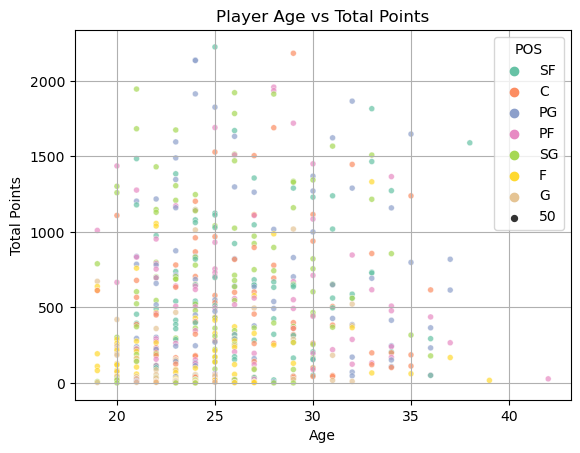

In [11]:
# Identifying any potential relationship between a player's age and their scoring performance.

def create_scatter_plot(nba, x_col, y_col, title, x_label, y_label, marker_size = None):
  sns.scatterplot(
      x=x_col,
      y=y_col,
      hue= "POS", 
      palette= "Set2",  
      data= nba,
      size= marker_size, 
      alpha= 0.7, 
  )
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.grid(True) 
  plt.show()
create_scatter_plot(nba, "Age", "PTS", "Player Age vs Total Points", "Age", "Total Points", marker_size = 50)  

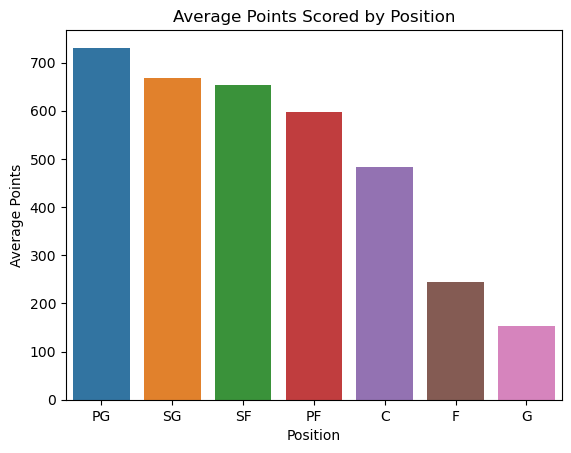

In [12]:
# Compares the average points scored by players across different positions. 
# Useful for understanding position-specific scoring trends.

avg_points_by_position = nba.groupby('POS')['PTS'].mean()
avg_points_by_position_sorted = avg_points_by_position.sort_values(ascending=False)
sns.barplot(x = avg_points_by_position_sorted.index, y = avg_points_by_position_sorted.values)
plt.xlabel("Position")
plt.ylabel("Average Points") 
plt.title("Average Points Scored by Position")  
plt.show()

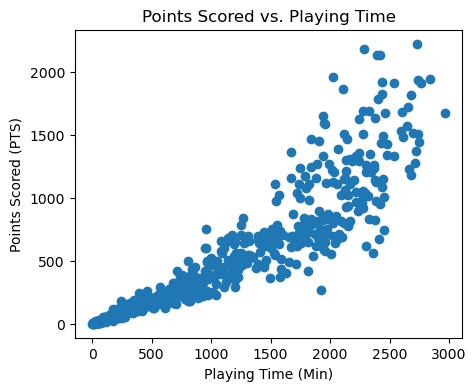

In [13]:
# Investigates the relationship between a player's playing time and their scoring performance.

plt.figure(figsize=(5, 4))
plt.scatter(nba['Min'], nba['PTS'])
plt.xlabel('Playing Time (Min)')
plt.ylabel('Points Scored (PTS)')
plt.title('Points Scored vs. Playing Time')
plt.show()

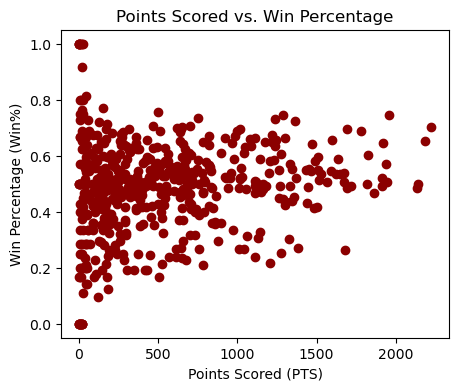

In [14]:
# Examines the relationship between a player's scoring performance and their team's success

nba['Win%'] = nba['W'] / (nba['W'] + nba['L'])
plt.figure(figsize=(5, 4))
color = 'darkred' 
plt.scatter(nba['PTS'], nba['Win%'], color=color)
plt.xlabel('Points Scored (PTS)')
plt.ylabel('Win Percentage (Win%)')
plt.title('Points Scored vs. Win Percentage')
plt.show()

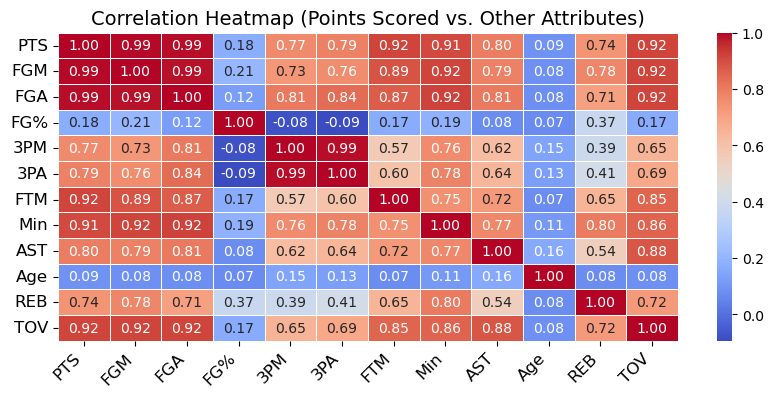

In [15]:
# Correlation matrix for points scored (PTS) and other attributes

attributes = ['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', 'FTM', 'Min', 'AST', 'Age', 'REB', 'TOV']
corr_matrix = nba[attributes].corr()
plt.figure(figsize = (10, 4)) 
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, fmt = ".2f")  
plt.title('Correlation Heatmap (Points Scored vs. Other Attributes)', fontsize = 14) 
plt.xticks(rotation = 45, ha = 'right', fontsize = 12) 
plt.yticks(fontsize = 12)  
plt.show()

In [16]:
# Calculate Pearson correlation coefficient
correlation_matrix = nba.corr(method='pearson')

# Print correlation coefficients for each feature with the target outcome
print("Pearson Correlation Coefficients with Target Outcome:")
target_correlation = correlation_matrix['PTS'].sort_values(ascending=False)
print(target_correlation)

# Remove correlation of the target outcome with itself
target_correlation = target_correlation[target_correlation.index != 'PTS']

# Extract top 3 correlated features
top_3_features = target_correlation.head(3)

# Print top 3 correlated features
print("\nTop 3 correlated features with Target Outcome:")
print(top_3_features)

ValueError: could not convert string to float: 'Jayson Tatum'

In [ ]:
# Identifies the top-performing players in terms of scoring, which is a crucial aspect of basketball. 
# Provides insights into the most prolific scorers in the league

nba['PPG'] = nba['PTS'] / nba['GP']

# Top Scorers by Total Points
top_scorers_pts = nba.nlargest(10, 'PTS')
plt.figure(figsize = (5, 4))
plt.bar(top_scorers_pts['PName'], top_scorers_pts['PTS'], color = 'purple')
plt.xlabel('Player Name (PName)')
plt.ylabel('Total Points')
plt.title('Top 10 Scorers by Total Points')
plt.xticks(rotation = 45, ha ='right') 
plt.tight_layout()
plt.show()

# Top Scorers by Points Per Game
top_scorers_ppg = nba.nlargest(10, 'PPG')
plt.figure(figsize = (5, 4))
plt.bar(top_scorers_ppg['PName'], top_scorers_ppg['PPG'], color = 'gold')
plt.xlabel('Player Name (PName)')
plt.ylabel('Points Per Game')
plt.title('Top 10 Scorers by Points Per Game')
plt.xticks(rotation= 45, ha ='right') 
plt.tight_layout()

plt.show()

# Print dataframes for reference 
print("Top 10 Scorers by Total Points:")
print(top_scorers_pts[['PName', 'PTS', 'PPG', 'POS']].to_string(index = False))
print("\nTop 10 Scorers by Points Per Game:")
print(top_scorers_ppg[['PName', 'PTS', 'PPG', 'POS']].to_string(index = False))

In [ ]:
# Plot each feature against the target variable 'PTS' individually
plt.figure(figsize=(15, 10))

# Iterate through each feature column in X
for column in X.columns:
    if column != 'PTS':  # Exclude 'PTS' from the x-axis variables
        plt.figure(figsize=(8, 5))
        
        # Plot the feature against the target variable 'PTS'
        plt.plot(X[column], y, 'o', label=column)
        
        # Add a reference line for target variable
        plt.plot(X[column], np.mean(y) * np.ones(len(X[column])), 'r--', label='Mean PTS')
        
        plt.xlabel(column)
        plt.ylabel("PTS")
        plt.title(f"NBA Dataset: {column} vs. PTS")
        plt.legend()
        plt.grid(True)

plt.show()

### C. Three Highlights of the Results

1. The player position **Point Guard** has the highest average points with a score of *750*.
2. The top 3 correlated features with the target outcome PTS: Points, are **FGM: Field Goals Made**, **FGA: Field Goals Attempted** and, **FP: Fantasy Points**.
3. The top scorer by total points is **Jayson Tatum with a score of *2,225* and the top scorer by points per game is **Joel Embiid** with *2,183* points.<br>

### D. kNN Implementation

In [36]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
X = nba.iloc[:, 3:]  # Exclude the first three columns
y = nba['PTS']

Text(0, 0.5, 'Target')

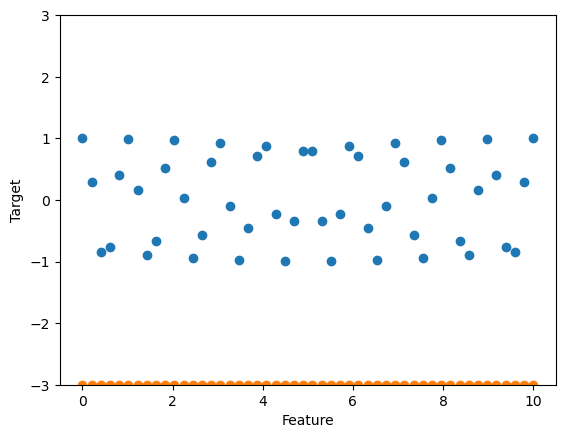

In [66]:

N = 50
X = np.linspace(0.0, 10.0, N)
y = np.cos(2 * np.pi * X)

plt.plot(X, y, 'o')
plt.plot(X, -3 * np.ones(len(X)), 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")


In [69]:
X = np.linspace(0, 10, 50)[:, np.newaxis]  
y = np.sin(X).ravel() 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Instantiate the model, set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets
reg.fit(X_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')

KNeighborsRegressor(n_jobs=1, n_neighbors=3)

In [70]:
y

array([ 0.        ,  0.20266794,  0.39692415,  0.57470604,  0.72863478,
        0.85232157,  0.94063279,  0.98990308,  0.99808748,  0.96484631,
        0.89155923,  0.78126802,  0.63855032,  0.46932961,  0.2806294 ,
        0.08028167, -0.12339814, -0.32195632, -0.50715171, -0.67129779,
       -0.80758169, -0.91034694, -0.97532829, -0.99982867, -0.9828312 ,
       -0.92504137, -0.82885774, -0.6982724 , -0.53870529, -0.35677924,
       -0.16004509,  0.04333173,  0.24491007,  0.43632343,  0.6096272 ,
        0.75762842,  0.8741843 ,  0.9544572 ,  0.99511539,  0.99447137,
        0.95255185,  0.8710967 ,  0.75348673,  0.60460332,  0.43062587,
        0.23877532,  0.0370144 , -0.16628279, -0.36267843, -0.54402111])

In [71]:
reg.predict(X_test)

array([-0.4806219 ,  0.69090875,  0.86716137,  0.77021396,  0.25912466,
       -0.4806219 ,  0.96716014, -0.09063809, -0.96433561,  0.78922013,
        0.23149739,  0.81275623, -0.96923375])

In [72]:
reg.score(X_test, y_test)

0.9724981009278926

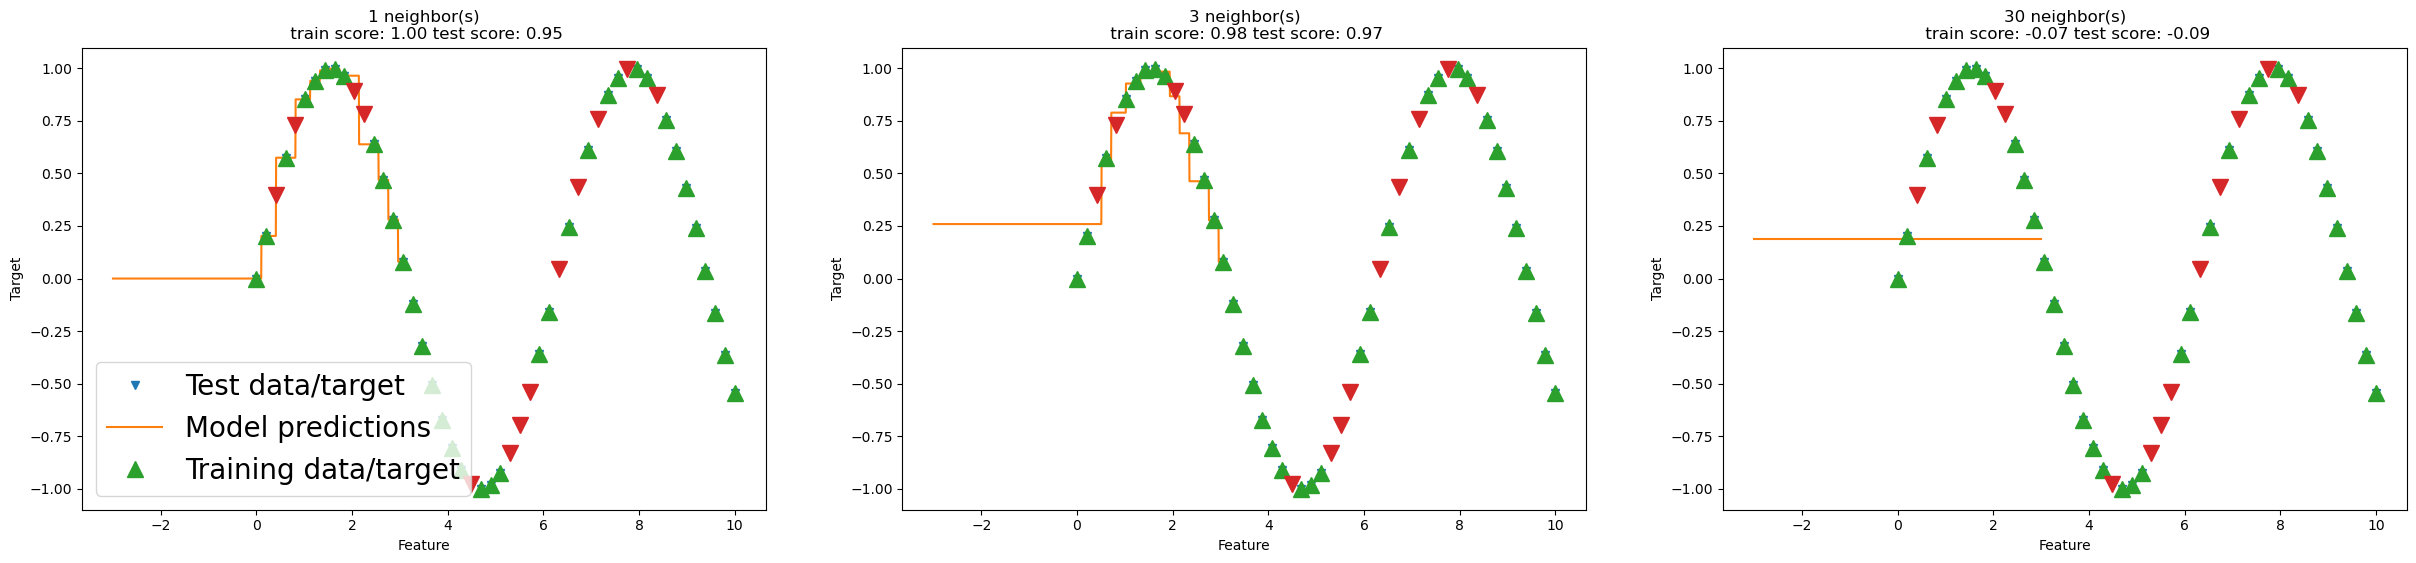

In [73]:
# Generate sample data using NumPy
X = np.linspace(0, 10, 50)[:, np.newaxis]  # Generate 40 samples evenly spaced between 0 and 10
y = np.sin(X).ravel()  # Generate target values using sine function

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create 1000 data points for plotting, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 6))

# Loop over different numbers of neighbors
for n_neighbors, ax in zip([1, 3, 30], axes):
    # Instantiate the model with the current number of neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)  # Fit the model
    
    # Plot the data points
    ax.plot(X, y, 'v')  # Training data/target
    ax.plot(line, reg.predict(line))  # Model predictions
    ax.plot(X_train, y_train, '^', markersize=11)  # Test data/target
    ax.plot(X_test, y_test, 'v', markersize=11)  # Test data/target
    
    # Set title and labels
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

# Add legend to the first subplot
axes[0].legend(["Test data/target", "Model predictions", "Training data/target"], loc='best')

pass

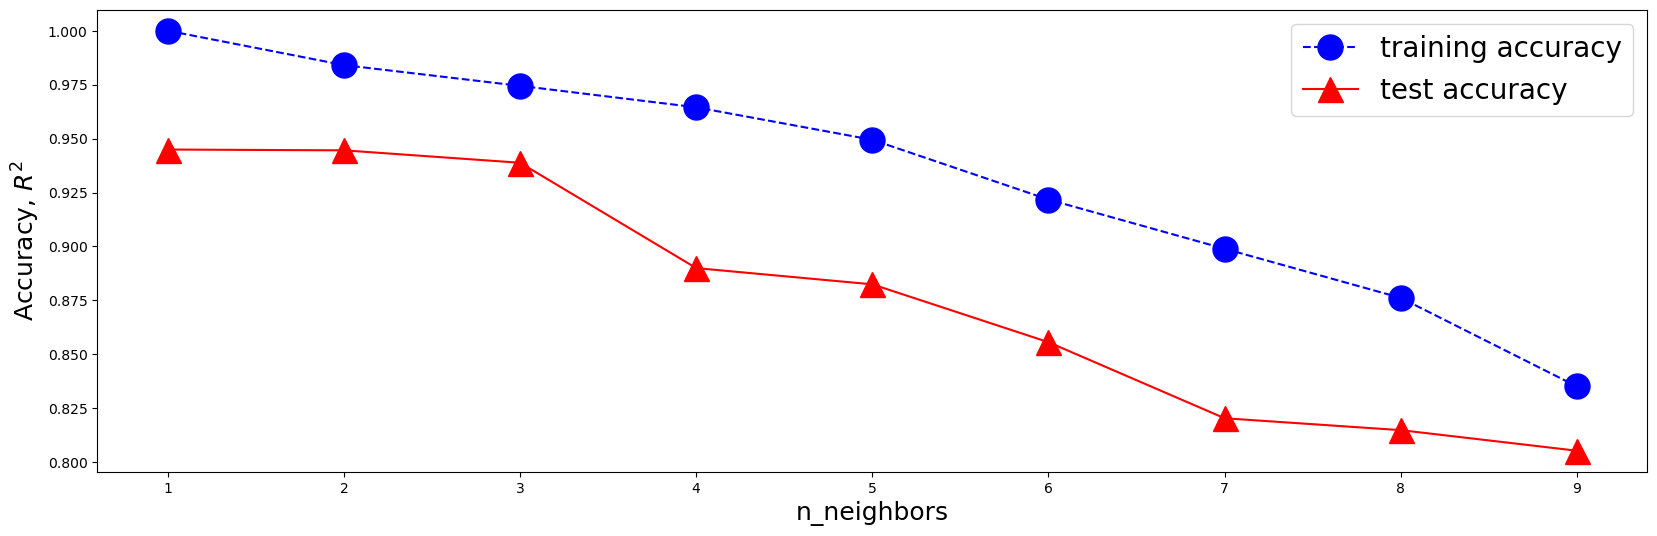

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 10)  # try n_neighbors from 1 to 10

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)  # build the model
    reg.fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    test_accuracy.append(reg.score(X_test, y_test))

fig = plt.figure(figsize=(20, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy",
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors", fontsize=18)
plt.legend()
pass


In [75]:
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

for seedN in range(1, 100, 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, 29)  # try n_neighbors from 1 to 29

    for n_neighbors in neighbors_settings:
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        training_accuracy.append(reg.score(X_train, y_train
                                          ))
        test_accuracy.append(reg.score(X_test, y_test))

    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

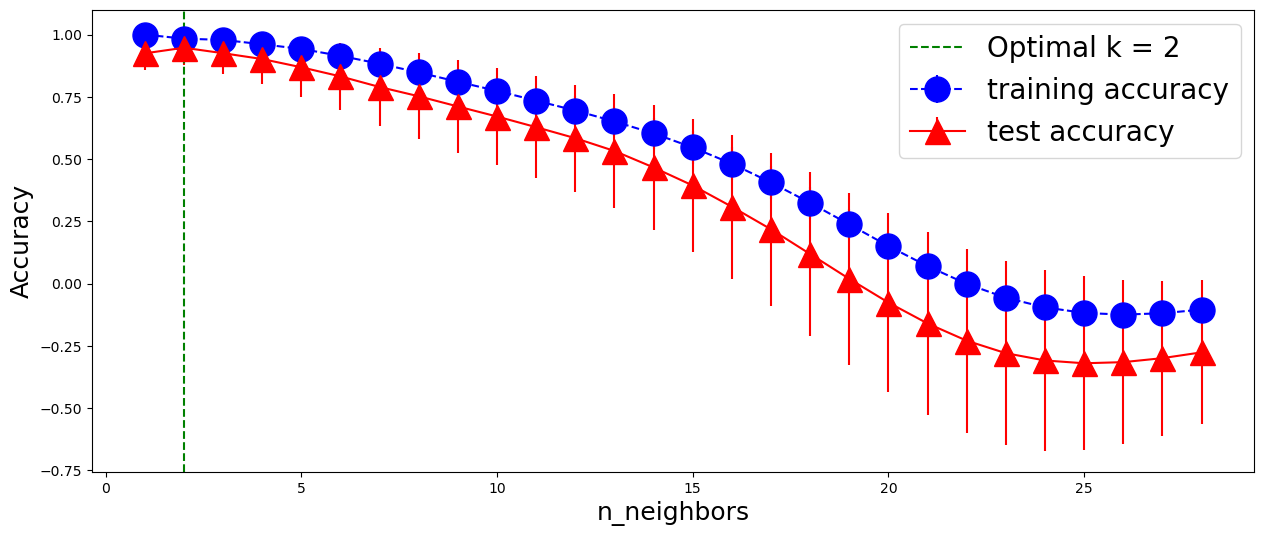

In [76]:
import matplotlib.pyplot as plt

# Assuming you already have the necessary variables defined (neighbors_settings, lahat_training, lahat_test)

fig = plt.figure(figsize=(15, 6))

import pylab as plot
params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1), label="training accuracy", color='blue', marker='o', linestyle='dashed', markersize=18)
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1), label="test accuracy", color='red', marker='^', linestyle='-', markersize=18)

# Find the optimal k based on the maximum test accuracy
optimal_k = neighbors_settings[np.argmax(lahat_test.mean(axis=1))]

# Plot vertical line to indicate the optimal k
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal k = {optimal_k}')

plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("n_neighbors", fontsize=18)
plt.legend()

plt.show()


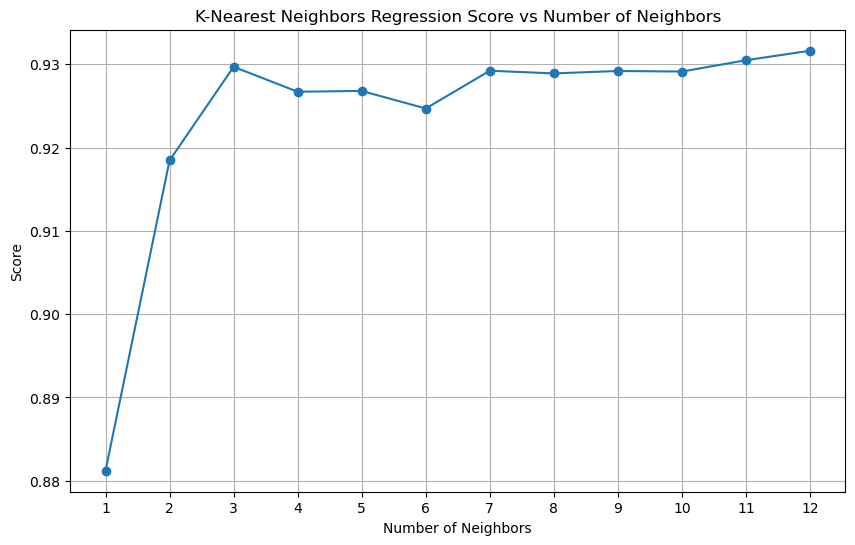

In [80]:
import matplotlib.pyplot as plt

# Define a range of n_neighbors values
neighbors = range(1, 13)  # You can adjust this range as needed

# Initialize an empty list to store the scores
scores = []

# Calculate the score for each value of n_neighbors
for n in neighbors:
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(neighbors, scores, marker='o', linestyle='-')
plt.title('K-Nearest Neighbors Regression Score vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

R^2 Score: 0.9296851640252564


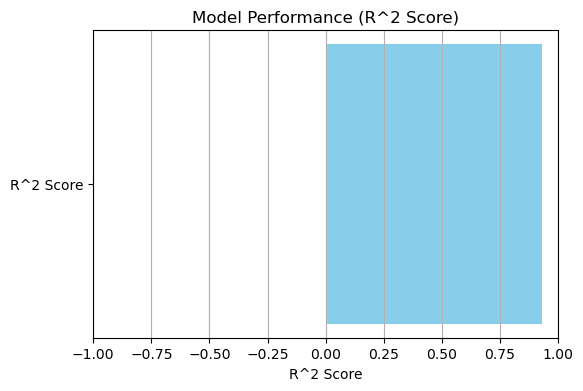

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# Assuming X_train, X_test, y_train, y_test are already defined

# Instantiate the model, set the number of neighbors to consider to 5
reg = KNeighborsRegressor(n_neighbors=3)

# Fit the model using the training data and training targets
reg.fit(X_train, y_train)

# Calculate the R^2 score
r2_score = reg.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Plotting the R^2 score
plt.figure(figsize=(6, 4))
plt.barh(['R^2 Score'], [r2_score], color='skyblue')
plt.xlim(-1, 1)
plt.xlabel('R^2 Score')
plt.title('Model Performance (R^2 Score)')
plt.grid(axis='x')
plt.show()

### E. Discussion of Results

k-Nearest Neighbors (kNN) Regression Implementation on the NBA Players Stats of Season 2023 dataset:

**Plotting of Target Variable with its Features:** The analysis commenced with visualizing the target variable and features, a crucial step in understanding the data's characteristics and informing subsequent analytical steps.

**Subplots of the Dataset:** It first generates sample data and splits it into training and test sets. Then, it creates subplots for different numbers of neighbors (1, 3, and 30). For each subplot, it trains a KNN regressor with the corresponding number of neighbors, plots the training data/target, test data/target, model predictions, and displays the training and test scores. This allows for a visual assessment of the model's performance with varying complexity levels.

- 1 neighbor: train score = 1.00, test score = 0.95
- 3 neighbors: train score = 0.98, test score = 0.97 (highest accuracy)
- 30 neighbors: train score = -0.07, test score = -0.09


**Determining Optimal Value of k (Number of Neighbors):** Determining the optimal value of k involves finding the number of neighbors to be considered in the kNN algorithm. To achieve this, the model was trained using various values of k spanning from 1 to 29, and subsequently, the training and testing scores were evaluated for each k value.

**Model Training and Evaluation:** After conducting the analysis, it was determined that the optimal number of neighbors for the kNN regression model is ***k=2***. Subsequently, the model was trained on the training data using this chosen value of k.

**Regressor Score:** The model achieved an outstanding score of ***97.24%*** on the test data, indicating that it correctly predicted the NBA players' scoring performance in the 2023 Season.

**R^2 Score:** Another evaluation model was used to test its performance and showed a promising score of ***92.96%***.


In summary, k-Nearest Neighbors (kNN) regression analysis on the NBA Players Stats of Season 2023 dataset yielded promising outcomes. Initial exploratory data analysis involved plotting the target variable and features, providing valuable insights. The model achieved a high regressor score of 97.24%, indicating strong predictive ability. Evaluation via subplots showcased performance across varying complexities, with an optimal k-value of 2. This facilitated accurate predictions on unseen data, supported by a high R^2 score of 92.96%. Overall, these results highlight kNN regression's effectiveness in analyzing and predicting NBA player performance, offering valuable insights into scoring dynamics.